In [26]:
import pandas as pd #modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import pathlib
from pathlib import Path
from datetime import datetime

In [27]:
import os

def find_reports_in_onedrive():
    """
    Scans the subfolders under the current user's OneDrive folder (including variations like 'OneDrive - Company Name')
    and returns the paths of all folders with the prefix 'reports'.

    Returns:
        list: A list of full paths to folders starting with 'reports', or an empty list if none are found.
    """
    # Get the base path to the user's home directory
    user_home = os.path.expanduser("~")

    # Find the OneDrive folder (handles variations like "OneDrive - Company Name")
    onedrive_folder = None
    for folder in os.listdir(user_home):
        if folder.startswith("OneDrive -"):
            onedrive_folder = os.path.join(user_home, folder)
            break

    if not onedrive_folder:
        raise FileNotFoundError("OneDrive folder not found for the current user.")

    # Search for folders with the prefix 'reports' in the OneDrive directory
    report_folders = []
    for root, dirs, files in os.walk(onedrive_folder):
        for dir_name in dirs:
            if dir_name.lower().startswith("reports"):
                report_folders.append(os.path.join(root, dir_name))

    return report_folders

In [28]:
reports_paths=find_reports_in_onedrive()
reports_paths

['C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_control_variables_refinacion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_cuchillas',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_eventos',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_humidity_measures',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_ops_pendings',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_pre-usos_diligenciamiento_no_cumple',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_quality_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_refination_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\control_room\\reports_causa_rechazos',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_humidity_measures\\reports_humidity']

In [29]:
str_folder_searcher="reports_visualizacion_data_produccion"
for report_path in reports_paths:
    if str_folder_searcher in report_path:
        path=Path(reports_paths[reports_paths.index(report_path)])
path=Path.joinpath(path,r"source_and_return_data")
path

WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data')

In [30]:
os.chdir(path) #change working directory to respective reports folder
os.getcwd()

'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion\\source_and_return_data'

In [31]:
directory = Path.joinpath(path,"data_plots") #get current work directory
directory.mkdir(exist_ok=True)
matching_files = list(directory.glob("*obj*.xlsx"))  # Busca archivos que contengan 'obj' y tengan extensión .xlsx
print("Archivos encontrados:", matching_files)

Archivos encontrados: [WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_aperturas_nariz.xlsx'), WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_causa_rechazos.xlsx')]


In [32]:
dict_data_pointer={} #dict to store files as dfs
for i in matching_files: # Read the Excel file 
    file_path = str(i)  # Update this with the path
    df = pd.read_excel(file_path)
    print(file_path)
    df_name=file_path.split("obj_")[1].split(".")[0] #split str with "obj_" and the  "." char and take the file name
    date_col="Fecha" #default col name with dates
    if "aperturas" in file_path.lower(): #if excel name file contains "aperturas", change col name with dates
        date_col="Fecha Paro"
    row_numbers_nan = df.index[df[date_col].isna()].tolist() # Get the row numbers where 'Fecha' or 'Fecha Paro' is NaN
    row_numbers = list(set(row_numbers_nan)) # lists of row with nan numbers
    filtered_df = df.drop(index=row_numbers) # Filter the DataFrame to keep only the rows that are not in row_numbers
    dict_data_pointer[f"{df_name}"]=filtered_df #store filtered df in dictionary data pointer
print(list(dict_data_pointer.keys())) #see keys on dictionary to check callability

C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_aperturas_nariz.xlsx
C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_causa_rechazos.xlsx
['aperturas_nariz', 'causa_rechazos']


In [33]:
df_root=dict_data_pointer['aperturas_nariz']
df_root[df_root["Fecha Paro"]=="NaT"]

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1


In [34]:
df_root

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
0,CRUDO,300 - SECADO PRIMERA Y SEGUNDA ETAPA,PARO PROGRAMADO,2025-02-01,09:00:00,13:00:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,LIMPIEZA DE EQUIPOS - PRO,se para linea para realizar limpiesa a secader...,240.01,2,9,153659
1,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:00:00,13:02:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",2.00,3,9,153659
2,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:10:00,13:18:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",8.00,3,9,153659
3,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:25:00,13:36:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",11.00,3,9,153659
4,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:48:00,14:07:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",19.00,3,9,153659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,19:20:00,19:23:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,3.00,3,5.5,154374
175,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,19:25:00,19:27:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,2.00,3,5.5,154374
176,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,19:30:00,19:33:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,3.00,3,5.5,154374
177,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,21:09:00,21:11:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,2.00,3,5.5,154374


In [35]:
df_pro=df_root[df_root["Tipo Paro"].str.contains("PRODUCCIÓN")]
#df_pro.set_index([pd.Index(range(len(df_pro)))],inplace=True)
df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #
df_pro['Fecha Paro']

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_5100\1638482938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #


5      2025-02-01
6      2025-02-02
8      2025-02-03
10     2025-02-03
22     2025-02-05
          ...    
174    2025-02-20
175    2025-02-20
176    2025-02-20
177    2025-02-20
178    2025-02-20
Name: Fecha Paro, Length: 96, dtype: object

# Drop duplicate apertures

In [36]:
dates_ar=[date for date in df_pro["Fecha Paro"].unique()]
dates_ar

['2025-02-01',
 '2025-02-02',
 '2025-02-03',
 '2025-02-05',
 '2025-02-06',
 '2025-02-07',
 '2025-02-08',
 '2025-02-09',
 '2025-02-10',
 '2025-02-11',
 '2025-02-12',
 '2025-02-13',
 '2025-02-15',
 '2025-02-16',
 '2025-02-17',
 '2025-02-18',
 '2025-02-19',
 '2025-02-20']

In [37]:
list_dropped_idx_rows=[]
for date_ar in dates_ar:
    print(date_ar)
    df_seeker=df_pro.loc[df_pro["Fecha Paro"]==date_ar] #filter by date
    rows_df_seeker=df_seeker.index #get idx of df for current date
    last_row=rows_df_seeker[-1] #to avoid out of range
    print(last_row)
    for idx,row in enumerate(rows_df_seeker):
        print(f"{row} from {len(rows_df_seeker)}")
        if row==last_row:
            continue #jump to next date
        if df_seeker.at[row,"Hora Final"]==df_seeker.at[rows_df_seeker[idx+1],"Hora Inicial"]:
            list_dropped_idx_rows.append(row+1) #add idx to be dropped
    print("idxs to drop are {}".format(list_dropped_idx_rows))
df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date
df_pro

2025-02-01
5
5 from 1
idxs to drop are []
2025-02-02
6
6 from 1
idxs to drop are []
2025-02-03
10
8 from 2
10 from 2
idxs to drop are []
2025-02-05
23
22 from 2
23 from 2
idxs to drop are []
2025-02-06
27
25 from 3
26 from 3
27 from 3
idxs to drop are []
2025-02-07
39
28 from 11
29 from 11
30 from 11
31 from 11
32 from 11
34 from 11
35 from 11
36 from 11
37 from 11
38 from 11
39 from 11
idxs to drop are [31, 35, 36, 37, 39]
2025-02-08
40
40 from 1
idxs to drop are [31, 35, 36, 37, 39]
2025-02-09
50
48 from 3
49 from 3
50 from 3
idxs to drop are [31, 35, 36, 37, 39, 49]
2025-02-10
65
52 from 12
53 from 12
54 from 12
55 from 12
58 from 12
59 from 12
60 from 12
61 from 12
62 from 12
63 from 12
64 from 12
65 from 12
idxs to drop are [31, 35, 36, 37, 39, 49, 61, 62, 63]
2025-02-11
74
72 from 3
73 from 3
74 from 3
idxs to drop are [31, 35, 36, 37, 39, 49, 61, 62, 63]
2025-02-12
94
75 from 14
76 from 14
77 from 14
78 from 14
79 from 14
80 from 14
81 from 14
82 from 14
83 from 14
86 from 14
87

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_5100\3455869565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date


,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
5,CRUDO,300 - SECADO PRIMERA Y SEGUNDA ETAPA,PRODUCCIÓN,2025-02-01,20:20:00,20:35:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,VARIACION TEMPERATURA - PRO,se presento un variacion de alta temperatura e...,15.0,3,9,153659
6,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-02-02,09:51:00,09:53:00,400 FORMACION Y PREPRENSA,DETECCIÓN DE METAL - MEC,Metal banda 415,2.0,2,9,153660
8,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-02-03,01:38:00,01:41:00,400 FORMACION Y PREPRENSA,DETECCIÓN DE METAL - MEC,Metal banda 415,3.0,1,5.5,153661
10,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-02-03,14:15:00,14:18:00,400 FORMACION Y PREPRENSA,VARIACION PESO - PRO,Al arrancar se presenta alto valor en la densi...,3.0,3,9,153663
22,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-02-05,13:46:00,13:52:00,400 FORMACION Y PREPRENSA,TABLERO EXPLOTADO - PRO,Al finalizar turno anterior se presentó evento...,7.0,3,15,153747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,19:20:00,19:23:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,3.0,3,5.5,154374
175,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,19:25:00,19:27:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,2.0,3,5.5,154374
176,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,19:30:00,19:33:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,3.0,3,5.5,154374
177,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-02-20,21:09:00,21:11:00,500 PRENSA DIEFFENBACHER,DETECCIÓN DE METAL - PRO,dector de metales en la 415,2.0,3,5.5,154374


In [38]:
df_count_fail_mode_equipment=df_pro.groupby(by=["Fecha Paro","Modo de Fallo","Descripción Equipo"]).count().loc[:,"Linea"]
df_count_fail_mode_equipment

Fecha Paro  Modo de Fallo                          Descripción Equipo                               
2025-02-01  VARIACION TEMPERATURA - PRO            300 SECADO PRIMERA Y SEGUNDA ETAPA                   1
2025-02-02  DETECCIÓN DE METAL - MEC               400 FORMACION Y PREPRENSA                            1
2025-02-03  DETECCIÓN DE METAL - MEC               400 FORMACION Y PREPRENSA                            1
            VARIACION PESO - PRO                   400 FORMACION Y PREPRENSA                            1
2025-02-05  TABLERO EXPLOTADO - PRO                400 FORMACION Y PREPRENSA                            2
2025-02-06  FALLA DE MOTOR - ELC                   200.225.05 TORNILLO #5 PRESTEAMING BIN               1
            TABLERO EXPLOTADO - PRO                500 PRENSA DIEFFENBACHER                             2
2025-02-07  ATASCO MATERIAL - PRO                  800.851 TORNILLO EXTRACTOR POLVO SIERRA DIAGONAL     3
            DETECCIÓN DE METAL - PRO               

In [39]:
multi_index_from_df=list(df_count_fail_mode_equipment.index)
multi_index_from_df

[('2025-02-01',
  'VARIACION TEMPERATURA - PRO',
  '300 SECADO PRIMERA Y SEGUNDA ETAPA'),
 ('2025-02-02', 'DETECCIÓN DE METAL - MEC', '400 FORMACION Y PREPRENSA'),
 ('2025-02-03', 'DETECCIÓN DE METAL - MEC', '400 FORMACION Y PREPRENSA'),
 ('2025-02-03', 'VARIACION PESO - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-02-05', 'TABLERO EXPLOTADO - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-02-06',
  'FALLA DE MOTOR - ELC',
  '200.225.05 TORNILLO #5 PRESTEAMING BIN'),
 ('2025-02-06', 'TABLERO EXPLOTADO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-02-07',
  'ATASCO MATERIAL - PRO',
  '800.851 TORNILLO EXTRACTOR POLVO SIERRA DIAGONAL'),
 ('2025-02-07',
  'DETECCIÓN DE METAL - PRO',
  '400.412 DETECTOR DE METALES BANDA DE FORMACION'),
 ('2025-02-07', 'TABLERO EXPLOTADO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-02-08', 'VARIACION NIVEL - PRO', '100.120 PISOS MOVILES'),
 ('2025-02-09',
  'PARO DE EMERGENCIA - PRO',
  '700.055 REDLER INCLINADO DE VYNCKE REDLER BIOMASA'),
 ('2025-02-09', 'VARIA

In [40]:
dates=sorted(list(set([multi_index[0] for multi_index in multi_index_from_df ])))
dates

['2025-02-01',
 '2025-02-02',
 '2025-02-03',
 '2025-02-05',
 '2025-02-06',
 '2025-02-07',
 '2025-02-08',
 '2025-02-09',
 '2025-02-10',
 '2025-02-11',
 '2025-02-12',
 '2025-02-13',
 '2025-02-15',
 '2025-02-16',
 '2025-02-17',
 '2025-02-18',
 '2025-02-19',
 '2025-02-20']

In [41]:
fail_modes=sorted(list(set([multi_index[1] for multi_index in multi_index_from_df ])))
fail_modes

['ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
 'AJUSTE PARAMETROS - PRO',
 'ALARMA VIBRACIÓN - PRO',
 'ATASCO MATERIAL - PRO',
 'DETECCIÓN DE METAL - MEC',
 'DETECCIÓN DE METAL - PRO',
 'FALLA DE MOTOR - ELC',
 'LIMPIEZA DE EQUIPOS - PRO',
 'PARO DE EMERGENCIA - PRO',
 'SENSOR OBSTRUIDO - PRO',
 'TABLERO EXPLOTADO - PRO',
 'VARIACION FLUJO - PRO',
 'VARIACION HUMEDAD - PRO',
 'VARIACION NIVEL - PRO',
 'VARIACION PESO - PRO',
 'VARIACION PRESION - PRO',
 'VARIACION TEMPERATURA - PRO']

In [42]:
equipments=sorted(list(set([multi_index[2] for multi_index in multi_index_from_df ])))
equipments

['100.120 PISOS MOVILES',
 '200.225.05 TORNILLO #5 PRESTEAMING BIN',
 '200.226.01M MOTOR TORNILLO ALIMENTACION AL SHUTE',
 '200.232 REFINADOR',
 '250.268 BOMBA DOSIFICACION DE AGUA',
 '250.271 SISTEMA DE DOSIFICACION',
 '300 SECADO PRIMERA Y SEGUNDA ETAPA',
 '400 FORMACION Y PREPRENSA',
 '400.399 BANDA 399',
 '400.412 DETECTOR DE METALES BANDA DE FORMACION',
 '400.415 BANDA DE FORMACION',
 '500 PRENSA DIEFFENBACHER',
 '500.511.12 CADENA RODS SUPERIOR',
 '600.606 VIA RODILLOS HACIA APILADO CALIBRES BAJOS',
 '600.612 VIA DE RODILLOS SALIDA APILADO',
 '600.631 SIERRA DIAGONAL',
 '700.055 REDLER INCLINADO DE VYNCKE REDLER BIOMASA',
 '800.809 SIFTER',
 '800.851 TORNILLO EXTRACTOR POLVO SIERRA DIAGONAL',
 'BOMBA ALTA PRESION HIT JET']

In [43]:
df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)
df_stacked_data

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_5100\558380705.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)


,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE PARAMETROS - PRO,ALARMA VIBRACIÓN - PRO,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - MEC,DETECCIÓN DE METAL - PRO,FALLA DE MOTOR - ELC,LIMPIEZA DE EQUIPOS - PRO,PARO DE EMERGENCIA - PRO,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO,VARIACION NIVEL - PRO,VARIACION PESO - PRO,VARIACION PRESION - PRO,VARIACION TEMPERATURA - PRO
2025-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
acronyms=lambda x:"\n"+''.join(w[0] for w in x.split("- PRO")[0].split() if w[0].isupper())
dict_stacked_values={fail_mode:[""]*len(dates) for fail_mode in fail_modes}
for date,fail_mode,equip in multi_index_from_df:
    print(date,fail_mode)
    count_by_date_by_fail_mode_by_equipment= df_count_fail_mode_equipment[date,fail_mode].sum() # df_count_fail_mode_equipment.at[date,fail_mode,equip]
    print(count_by_date_by_fail_mode_by_equipment)
    value_label_plus_equip=str(count_by_date_by_fail_mode_by_equipment)+f" {acronyms(fail_mode)}" # equip.split(" ")[0]+":"+
    print("valor mas equipo: ",value_label_plus_equip)
    df_stacked_data.loc[date,fail_mode]=count_by_date_by_fail_mode_by_equipment
    idx_date=dates.index(date)
    dict_stacked_values[fail_mode][idx_date]=value_label_plus_equip
    dict_stacked_values[fail_mode][idx_date]
dict_stacked_values

2025-02-01 VARIACION TEMPERATURA - PRO
1
valor mas equipo:  1 
VT
2025-02-02 DETECCIÓN DE METAL - MEC
1
valor mas equipo:  1 
DDMM
2025-02-03 DETECCIÓN DE METAL - MEC
1
valor mas equipo:  1 
DDMM
2025-02-03 VARIACION PESO - PRO
1
valor mas equipo:  1 
VP
2025-02-05 TABLERO EXPLOTADO - PRO
2
valor mas equipo:  2 
TE
2025-02-06 FALLA DE MOTOR - ELC
1
valor mas equipo:  1 
FDME
2025-02-06 TABLERO EXPLOTADO - PRO
2
valor mas equipo:  2 
TE
2025-02-07 ATASCO MATERIAL - PRO
3
valor mas equipo:  3 
AM
2025-02-07 DETECCIÓN DE METAL - PRO
1
valor mas equipo:  1 
DDM
2025-02-07 TABLERO EXPLOTADO - PRO
2
valor mas equipo:  2 
TE
2025-02-08 VARIACION NIVEL - PRO
1
valor mas equipo:  1 
VN
2025-02-09 PARO DE EMERGENCIA - PRO
1
valor mas equipo:  1 
PDE
2025-02-09 VARIACION PRESION - PRO
1
valor mas equipo:  1 
VP
2025-02-10 AJUSTE PARAMETROS - PRO
1
valor mas equipo:  1 
AP
2025-02-10 ATASCO MATERIAL - PRO
3
valor mas equipo:  3 
AM
2025-02-10 ATASCO MATERIAL - PRO
3
valor mas equipo:  3 
AM
2025-0

{'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '1 \nASS',
  '',
  '',
  '',
  '',
  '',
  '1 \nASS',
  ''],
 'AJUSTE PARAMETROS - PRO': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '1 \nAP',
  '',
  '1 \nAP',
  '',
  '',
  '2 \nAP',
  '',
  '3 \nAP',
  '',
  ''],
 'ALARMA VIBRACIÓN - PRO': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '2 \nAV',
  '',
  '',
  ''],
 'ATASCO MATERIAL - PRO': ['',
  '',
  '',
  '',
  '',
  '3 \nAM',
  '',
  '',
  '3 \nAM',
  '1 \nAM',
  '2 \nAM',
  '1 \nAM',
  '3 \nAM',
  '',
  '',
  '',
  '',
  ''],
 'DETECCIÓN DE METAL - MEC': ['',
  '1 \nDDMM',
  '1 \nDDMM',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'DETECCIÓN DE METAL - PRO': ['',
  '',
  '',
  '',
  '',
  '1 \nDDM',
  '',
  '',
  '1 \nDDM',
  '',
  '1 \nDDM',
  '4 \nDDM',
  '',
  '',
  '1 \nDDM',
  '',
  '5 \nDDM',
  '10 \nDDM'],
 'FALLA DE MOTOR - ELC': 

In [45]:
df_stacked_data

,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE PARAMETROS - PRO,ALARMA VIBRACIÓN - PRO,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - MEC,DETECCIÓN DE METAL - PRO,FALLA DE MOTOR - ELC,LIMPIEZA DE EQUIPOS - PRO,PARO DE EMERGENCIA - PRO,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO,VARIACION NIVEL - PRO,VARIACION PESO - PRO,VARIACION PRESION - PRO,VARIACION TEMPERATURA - PRO
2025-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2025-02-02,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2025-02-05,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2025-02-06,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0
2025-02-07,0,0,0,3,0,1,0,0,0,0,2,0,0,0,0,0,0
2025-02-08,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2025-02-09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2025-02-10,0,1,0,3,0,1,0,2,0,1,1,0,0,0,0,0,0
2025-02-11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0


In [46]:
list_count_by_fail_mode_per_date=list(df_stacked_data.T.values)
weight_counts={" ".join(fail_mode.split("-")[0].split()).lower()+":"+acronyms(fail_mode.upper()):list_count_by_fail_mode_per_date[idx] for idx,fail_mode in enumerate(fail_modes)}
weight_counts

{'accionamiento sistema seguridad:\nASS': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]),
 'ajuste parametros:\nAP': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 3, 0, 0]),
 'alarma vibración:\nAV': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]),
 'atasco material:\nAM': array([0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 2, 1, 3, 0, 0, 0, 0, 0]),
 'detección de metal:\nDDMM': array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'detección de metal:\nDDM': array([ 0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  4,  0,  0,  1,  0,  5,
        10]),
 'falla de motor:\nFDME': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'limpieza de equipos:\nLDE': array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 'paro de emergencia:\nPDE': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'sensor obstruido:\nSO': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'tablero explotado:\nTE': array([0, 0, 0, 2, 2, 2, 0,

In [47]:
for new_key,old_key in zip(weight_counts.keys(),fail_modes):
    dict_stacked_values[new_key] = dict_stacked_values.pop(old_key)
dict_stacked_values

{'accionamiento sistema seguridad:\nASS': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '1 \nASS',
  '',
  '',
  '',
  '',
  '',
  '1 \nASS',
  ''],
 'ajuste parametros:\nAP': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '1 \nAP',
  '',
  '1 \nAP',
  '',
  '',
  '2 \nAP',
  '',
  '3 \nAP',
  '',
  ''],
 'alarma vibración:\nAV': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '2 \nAV',
  '',
  '',
  ''],
 'atasco material:\nAM': ['',
  '',
  '',
  '',
  '',
  '3 \nAM',
  '',
  '',
  '3 \nAM',
  '1 \nAM',
  '2 \nAM',
  '1 \nAM',
  '3 \nAM',
  '',
  '',
  '',
  '',
  ''],
 'detección de metal:\nDDMM': ['',
  '1 \nDDMM',
  '1 \nDDMM',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'detección de metal:\nDDM': ['',
  '',
  '',
  '',
  '',
  '1 \nDDM',
  '',
  '',
  '1 \nDDM',
  '',
  '1 \nDDM',
  '4 \nDDM',
  '',
  '',
  '1 \nDDM',
  '',
  '5 \nDDM',
  '10 \nDDM'],
 'falla de motor:\nFDME': [

# Plot

In [48]:
colors_available=mcolors.TABLEAU_COLORS
colors_available

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [49]:
"""
colors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}
colors_choosen
"""

'\ncolors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}\ncolors_choosen\n'

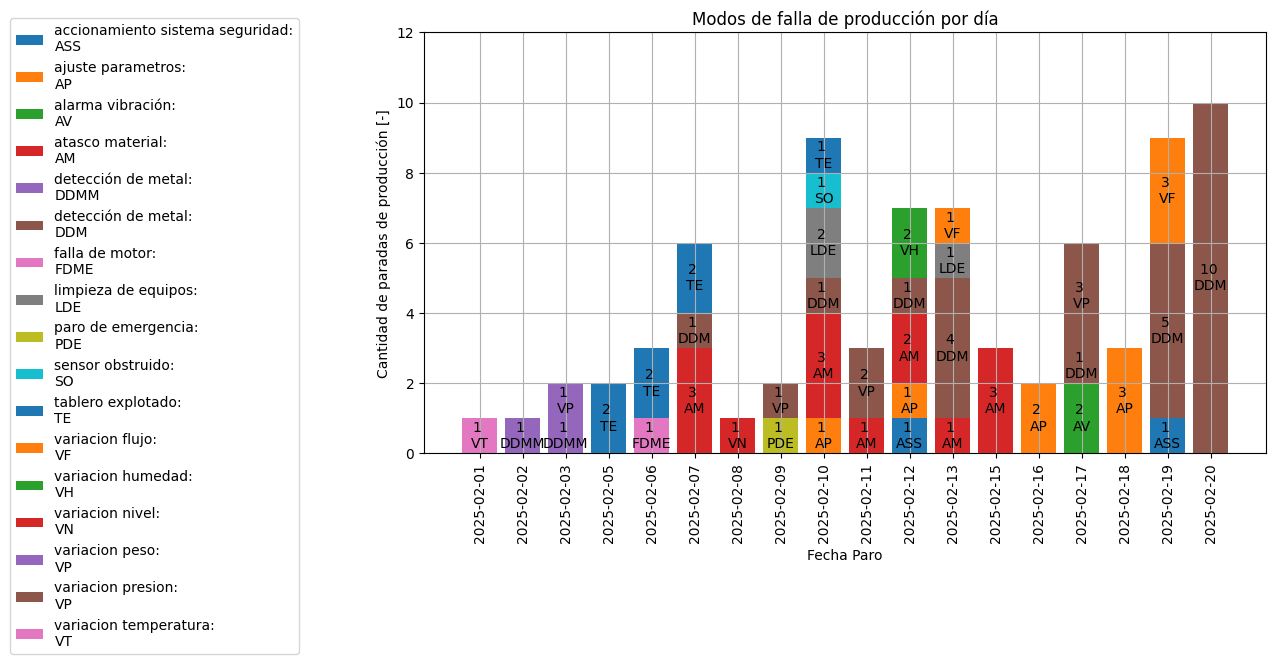

In [56]:
fig, ax = plt.subplots()
fig.tight_layout()  # Adjust layout to prevent clipping of labels
#fig.set_figheight(8)
fig.set_figwidth(9.5)
#fig.set_size_inches(50, 40) #set plot size
#plot aperturas
amt_dates=len(dates)
bottom = np.zeros(amt_dates) #initial axis for stacked bars plotting
plt.grid() #make grid mesh
max_bottom=0 #to store max of bottoms in construction of bar
for (data_label,weight_count),bar_value_stick in zip(weight_counts.items(),dict_stacked_values.values()): # ,colors_choosen run through dates, rejected per cause per dates, labels of values of rejected per cause per day 
    p = ax.bar(dates, weight_count,label=data_label,bottom=bottom) # ,color=color_cause take bar plot elements: rectangle(attribute 1, attribute 2, ...)
    bottom += weight_count #make new start to plot next top rectangle
    check_bottom=np.max(bottom)
    if check_bottom>max_bottom:
        max_bottom=check_bottom #to generate ylim of causas rechazos
    ax.bar_label(p,labels=bar_value_stick,label_type='center',color="black") #   add bar height str value on bar center
leq=ax.legend(bbox_to_anchor=(-0.5,1.05),loc="upper left") #generate legend box for bar plot
amt_xticks=range(len(dates))
ax.set_xticks(amt_xticks)
ax.set_xticklabels(dates,rotation=90) #rotate x axis labels 90º to be displayed vertically
ax.set_xlabel("Fecha Paro") #name of bar plot x axis
amt_stops_per_fail_mode=np.array(list(weight_counts.values()))
max_y_axis=np.max(amt_stops_per_fail_mode) #get max of all data
ax.set_yticks(np.arange(0, max_y_axis*(1.40), 2)) #set y axis label values: axis pitch=10 unds
ax.set_ylabel("Cantidad de paradas de producción [-]") #y axis name for bar plot
ax.set_aspect('auto')
imgs_folder="/imgs_reports_daily" #str with name to save plots
imgs_type_folder="/fail_modes_equipments"
imgs_year_folder=f"/year_{dates[0].split("-")[0]}"
imgs_month_folder=f"/month_{dates[0].split("-")[1]}"
img_name="/fail_modes_PRO_per_Type" #name of img file
str_today=datetime.today().strftime('%Y-%m-%d') #asign date of generation
plt.title("Modos de falla de producción por día") #make title
directory_to_save = Path(str(directory)+imgs_folder+imgs_type_folder+imgs_year_folder+imgs_month_folder) # get directory to save plot
directory_to_save.mkdir(exist_ok=True)
plt.savefig(str(directory_to_save)+img_name+dates[0]+"_"+dates[-1]+"_"+str_today+".png", bbox_inches='tight') #store img plot
plt.show()